## Analysis notebook for HW1

In [1]:
import os
import sys
import nstrace # nstrace module 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### if no PyGnuplot module
!pip install PyGnuplot

  Created wheel for PyGnuplot: filename=PyGnuplot-0.11.16-cp36-none-any.whl size=4490 sha256=6fb80fbf465d0d3d52aa8965f4b915c1c490b26ad09d0240b32fcba0b32c67ca
  Stored in directory: /home/tkurihana/.cache/pip/wheels/df/4c/cb/d2da508081e226d79c0c27ebf2d9e975e6a840a9c9b8e02c40
Successfully built PyGnuplot


In [3]:
import PyGnuplot as gp

In [4]:
import pandas as pd

####  Practice: Read files

In [7]:
data = pd.read_table("./reno_reno/out_0.1Mb.tr",header=None,sep=' ',) 

In [10]:
data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']

In [11]:
data

,event,time,from node,to node,pkt type,pkt size,flags,fid,src addr,dst addr,seq num,pkt id
0,+,0.500000,0,1,tcp,40,-------,0,0.0,3.0,0,0
1,-,0.500000,0,1,tcp,40,-------,0,0.0,3.0,0,0
2,+,0.500000,4,1,tcp,40,-------,1,4.0,5.0,0,1
3,-,0.500000,4,1,tcp,40,-------,1,4.0,5.0,0,1
4,r,0.510032,0,1,tcp,40,-------,0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2077,+,10.476784,1,2,tcp,1000,-------,0,0.0,3.0,65,238
2078,r,10.482752,3,2,ack,40,-------,0,3.0,0.0,63,239
2079,+,10.482752,2,1,ack,40,-------,0,3.0,0.0,63,239
2080,-,10.482752,2,1,ack,40,-------,0,3.0,0.0,63,239


- Extract rows where loss/drop packet happened

In [16]:
drops = data[data['event'] == 'd']

In [17]:
drops

,event,time,from node,to node,pkt type,pkt size,flags,fid,src addr,dst addr,seq num,pkt id
170,d,1.202992,1,2,tcp,1000,-------,0,0.0,3.0,8,22
193,d,1.282992,1,2,tcp,1000,-------,0,0.0,3.0,10,25
216,d,1.362992,1,2,tcp,1000,-------,0,0.0,3.0,12,28
239,d,1.442992,1,2,tcp,1000,-------,0,0.0,3.0,14,31
262,d,1.522992,1,2,tcp,1000,-------,1,4.0,5.0,8,34
285,d,1.602992,1,2,tcp,1000,-------,1,4.0,5.0,10,37
308,d,1.682992,1,2,tcp,1000,-------,1,4.0,5.0,12,40
331,d,1.762992,1,2,tcp,1000,-------,1,4.0,5.0,14,43
354,d,1.842992,1,2,tcp,1000,-------,0,0.0,3.0,16,46
431,d,2.162992,1,2,tcp,1000,-------,1,4.0,5.0,16,55


- Extract number of "ack" packet (col name == 'pkt type')

In [18]:
acks = data[data['pkt type'] == 'ack']

In [19]:
acks

,event,time,from node,to node,pkt type,pkt size,flags,fid,src addr,dst addr,seq num,pkt id
17,+,0.573264,3,2,ack,40,-------,0,3.0,0.0,0,2
18,-,0.573264,3,2,ack,40,-------,0,3.0,0.0,0,2
20,+,0.576464,5,2,ack,40,-------,1,5.0,4.0,0,3
21,-,0.576464,5,2,ack,40,-------,1,5.0,4.0,0,3
22,r,0.583296,3,2,ack,40,-------,0,3.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2074,+,10.472720,3,2,ack,40,-------,0,3.0,0.0,63,239
2075,-,10.472720,3,2,ack,40,-------,0,3.0,0.0,63,239
2078,r,10.482752,3,2,ack,40,-------,0,3.0,0.0,63,239
2079,+,10.482752,2,1,ack,40,-------,0,3.0,0.0,63,239


- Get packet loss rate  
$$ \text{loss rate} = \frac{\text{\# of drops}}{\text{\# of acks}} $$

In [22]:
loss_rate = len(drops)/len(acks)*100 
loss_rate

1.407035175879397

- Get average bandwidth
$$ \text{Avg. Bandwidth} = \frac{ \text{\# of ack packets}}{ \text{time} } [packet / sec] $$ 

In [27]:
avg_bandwidth = acks[acks['event'] == 'r']['pkt size'].sum()/10
print(" Average bandwidth == {} [packets/sec]".format(avg_bandwidth))

 Average bandwidth == 1324.0 [packets/sec]


In [28]:
avg_bandwidth/8, 

165.5

- gnuplot with python

#### Workflow
1. Load 2 'tcp' files; 1 is for Node 1--> Node 4, 5 is Node 5--> Node 6.  
2. get df array which only has "time:" and 'cwnd:'
3. Save them in tmp files
4. Load these files by PyGnuplot and Draw

In [49]:
node1 = pd.read_table("./reno_reno/out_0.1Mb_1.tcp",header=None,sep="\s*", error_bad_lines=False)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [50]:
node1.drop(node1.columns[[ i for i in range(0,30,2)]], axis=1, inplace=True)

In [52]:
node1.columns= [
    "time", "saddr", "sport", "daddr", "dport", "maxseq", "hiack", "seqno", 
    "cwnd", "ssthresh", "dupacks", "rtt", "srtt", "rttvar", "bkoff"
]

In [53]:
node1

,time,saddr,sport,daddr,dport,maxseq,hiack,seqno,cwnd,ssthresh,dupacks,rtt,srtt,rttvar,bkoff
0,0.00000,0,0,3,0,-1,-1,0,1.000,20,0,0.00,0.00,12.000,1
1,0.64653,0,0,3,0,0,0,1,2.000,100,0,0.14,0.14,0.070,1
2,0.87139,0,0,3,0,2,1,3,3.000,100,0,0.23,0.15,0.075,1
3,0.95139,0,0,3,0,4,2,5,4.000,100,0,0.23,0.15,0.075,1
4,1.19139,0,0,3,0,6,3,7,5.000,100,0,0.32,0.17,0.100,1
5,1.27139,0,0,3,0,8,4,9,6.000,100,0,0.32,0.17,0.100,1
6,1.35139,0,0,3,0,10,5,11,7.000,100,0,0.32,0.17,0.100,1
7,1.43139,0,0,3,0,12,6,13,8.000,100,0,0.32,0.17,0.100,1
8,1.83139,0,0,3,0,14,7,15,9.000,100,0,0.64,0.23,0.193,1
9,2.07139,0,0,3,0,18,7,19,4.500,4,3,0.64,0.23,0.193,1


##### Get and Merge necessary columns

In [62]:
out1 = pd.merge(node1['time'], node1['cwnd'], left_index=True, right_index=True)

In [63]:
out1

,time,cwnd
0,0.00000,1.000
1,0.64653,2.000
2,0.87139,3.000
3,0.95139,4.000
4,1.19139,5.000
5,1.27139,6.000
6,1.35139,7.000
7,1.43139,8.000
8,1.83139,9.000
9,2.07139,4.500


In [65]:
### Save to tmp file as txt
out1.to_csv("./reno_reno/_tmp_out_1Mb_1.out", sep=',', header=False)

In [75]:
### Plot all
gp.c('set title "cwnd N1 to N4 at 1Mb"; set xlabel "time [sec]"; set ylabel; "# of packets"')
gp.c('set datafile separator ","')
gp.c('plot "./reno_reno/_tmp_out_1Mb_1.out" u 2:3 w p')
gp.p('pygnu.eps')

-------------------
### Part 1

#### 1.1
- reno-reno
- newreno-reno
- vegas-vegas
- newreno-vegas

#### 1.2
- single-reno
- single-newreno
- single-vegas

##### bandwidth 
0.01, 0.1, 0.5, 1, 5, 10, 100

###### 1.1

In [94]:
expdirname=[
    "reno_reno",
    "newreno_reno",
    "vegas_vegas",
    "newreno_vegas",
]

In [77]:
bandwidths = [ str(i) for i in [0.01, 0.1, 0.5, 1, 5, 10, 100]]

In [91]:
def compute_loss_bd(drops, acks, ctime=10.0): 
    # compute
    loss_rate = len(drops)/len(acks)*100 
    avg_bandwidth = acks[acks['event'] == 'r']['pkt size'].sum()/ctime
    return loss_rate, avg_bandwidth

In [87]:
def get_trfile(filename):
    """compute average loss rate & bandwidth
        filename : directory + filename
        ctime : simulation computing time 10s for all test 
    """
    data = pd.read_table(filename,header=None,sep=' ',) 
    data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']
    drops = data[data['event'] == 'd']
    acks = data[data['pkt type'] == 'ack']
    return drops, acks

In [95]:
loss_rates = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
avg_bds = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
for idx, iexpdir in enumerate(expdirname):
    for jdx, ibandwidth in enumerate(bandwidths):
        
        # get file content
        basefname = 'out_'+ibandwidth+'Mb.tr'
        ifile = os.path.join('./'+iexpdir, basefname)
        drops, acks = get_tcpfile(ifile)
        
        loss_rate, avg_bandwidth = compute_loss_bd(drops, acks)
        loss_rates[idx, jdx] = loss_rate
        avg_bds[idx, jdx] = avg_bandwidth
    print(" ### END {} ###".format(iexpdir))

 ### END reno_reno ###
 ### END newreno_reno ###
 ### END vegas_vegas ###
 ### END newreno_vegas ###


- Check visualization

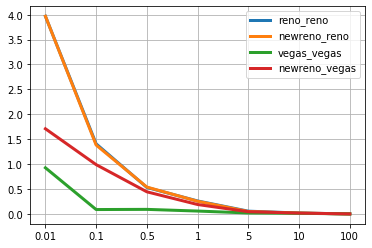

In [107]:
### drop rate
plt.figure()
for i in range(4):
    x = [i for i in range(len(bandwidths))]
    plt.plot(loss_rates[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

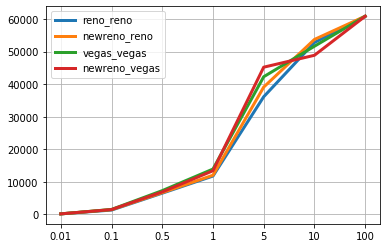

In [106]:
### avg bandwith
plt.figure()
for i in range(4):
    x = [i for i in range(len(bandwidths))]
    plt.plot(avg_bds[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

##### save files

In [111]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_twoflows_loss.txt',loss_rates.T)

In [110]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_twoflows_bandwidth.txt',avg_bds.T)

##### 1.2

In [112]:
expdirname=[
    "single_reno",
    "single_newreno",
    "single_vegas",
]

In [113]:
loss_rates = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
avg_bds = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
for idx, iexpdir in enumerate(expdirname):
    for jdx, ibandwidth in enumerate(bandwidths):
        
        # get file content
        basefname = 'out_'+ibandwidth+'Mb.tr'
        ifile = os.path.join('./'+iexpdir, basefname)
        drops, acks = get_tcpfile(ifile)
        
        loss_rate, avg_bandwidth = compute_loss_bd(drops, acks)
        loss_rates[idx, jdx] = loss_rate
        avg_bds[idx, jdx] = avg_bandwidth
    print(" ### END {} ###".format(iexpdir))

 ### END single_reno ###
 ### END single_newreno ###
 ### END single_vegas ###


- check visualization

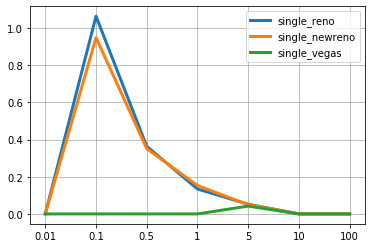

In [115]:
### drop rate
plt.figure()
for i in range(3):
    x = [i for i in range(len(bandwidths))]
    plt.plot(loss_rates[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

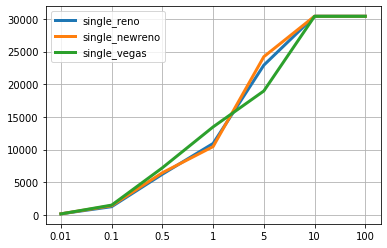

In [116]:
### avg bandwith
plt.figure()
for i in range(3):
    x = [i for i in range(len(bandwidths))]
    plt.plot(avg_bds[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

In [117]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_singleflows_loss.txt',loss_rates.T)

In [118]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_singleflows_bandwidth.txt',avg_bds.T)

#### Figure by PyGnuplot

- Dual Flow

In [176]:
### Plot all
gp.c('set title "Average Packet Loss Rate" font "Helveticam, 18"; set xlabel "bottleneck bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:7]')
gp.c('set xtics ("0.01" 0, "0.1" 1, "0.5" 2, "1" 3, "5" 4, "10" 5, "100" 6 )')
gp.c('plot   "./part1_twoflows_loss.txt" u 1 w lp  pt 7 ps 1.5 title "Reno-Reno"')
gp.c('replot "./part1_twoflows_loss.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno-Reno"')
gp.c('replot "./part1_twoflows_loss.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas-Vegas"')
gp.c('replot "./part1_twoflows_loss.txt" u 4 w lp  pt 7 ps 1.5 title "NewReno-Vegas"')
gp.p('part1_PacketLossRatio.ps')

In [195]:
### Plot all
gp.c('set title "Average Bandwidth" font "Helveticam, 18"; set xlabel "bottleneck bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key left top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:7]')
gp.c('set yrange [0:70000]')
gp.c('set xtics ("0.01" 0, "0.1" 1, "0.5" 2, "1" 3, "5" 4, "10" 5, "100" 6 )')
gp.c('plot   "./part1_twoflows_bandwidth.txt" u 1 w lp  pt 7 ps 1.5 title "Reno-Reno"')
gp.c('replot "./part1_twoflows_bandwidth.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno-Reno"')
gp.c('replot "./part1_twoflows_bandwidth.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas-Vegas"')
gp.c('replot "./part1_twoflows_bandwidth.txt" u 4 w lp  pt 7 ps 1.5 title "NewReno-Vegas"')
gp.p('part1_Bandwidth.ps')

- Single Flow

In [185]:
### Plot all
gp.c('set title "Average Packet Loss Rate" font "Helveticam, 18"; set xlabel "bottleneck bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:7]')
gp.c('set xtics ("0.01" 0, "0.1" 1, "0.5" 2, "1" 3, "5" 4, "10" 5, "100" 6 )')
gp.c('plot   "./part1_singleflows_loss.txt" u 1 w lp  pt 7 ps 1.5 title "Reno"')
gp.c('replot "./part1_singleflows_loss.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno"')
gp.c('replot "./part1_singleflows_loss.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas"')
gp.p('part1_PacketLossRatio_single.ps')

In [197]:
### Plot all
gp.c('set title "Average Bandwidth" font "Helveticam, 18"; set xlabel "bottleneck bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key left top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:7]')
gp.c('set yrange [0:40000]')
gp.c('set xtics ("0.01" 0, "0.1" 1, "0.5" 2, "1" 3, "5" 4, "10" 5, "100" 6 )')
gp.c('plot   "./part1_singleflows_bandwidth.txt" u 1 w lp  pt 7 ps 1.5 title "Reno-Reno"')
gp.c('replot "./part1_singleflows_bandwidth.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno-Reno"')
gp.c('replot "./part1_singleflows_bandwidth.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas-Vegas"')
gp.p('part1_Bandwidth_single.ps')